In [54]:
import config
from data_loader import *
import warnings
warnings.simplefilter("ignore", UserWarning)
import torch
# import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.nn import MultiLabelMarginLoss
import time
from tqdm import tqdm
from torchvision import transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
import pydicom
from pydicom.tag import Tag

In [5]:
loader = load_path()

loader.get_path(config.DATASET_MAIN_BRUNCH)
(im_path, mask_path) = loader.load_path()

In [7]:
imagePaths = sorted(list(im_path))
maskPaths = sorted(list(mask_path))
split = train_test_split(imagePaths,maskPaths,test_size=config.TEST_SPLIT,random_state = config.RAND_STATE)
train_paths_Images,test_paths_Images,train_paths_Masks,test_paths_Masks = split[0],split[1],split[2],split[3]
transforms = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor()])

In [8]:
_train = FetchImage(train_paths_Images,train_paths_Masks,transforms)
_test = FetchImage(test_paths_Images, test_paths_Masks, transforms)
train_Loader = DataLoader(_train,shuffle = True, batch_size = config.BATCH_SIZE,
                              pin_memory = config.PIN_MEMORY)
test_Loader = DataLoader(_test, shuffle=True, batch_size=config.BATCH_SIZE,
                              pin_memory=config.PIN_MEMORY)

(0010, 0010) Patient's Name                      PN: 'ProstateX-0076'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 832


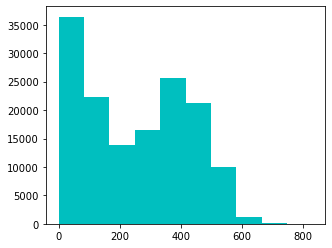

(0010, 0010) Patient's Name                      PN: 'ProstateX-0154'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 869


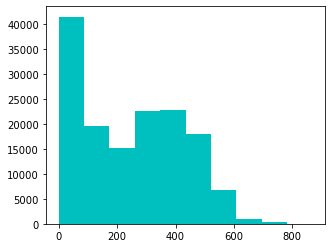

(0010, 0010) Patient's Name                      PN: 'ProstateX-0171'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 1250


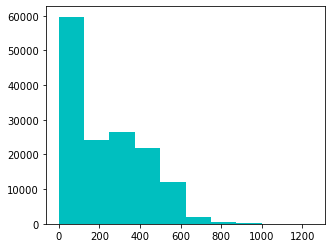

(0010, 0010) Patient's Name                      PN: 'ProstateX-0181'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 712


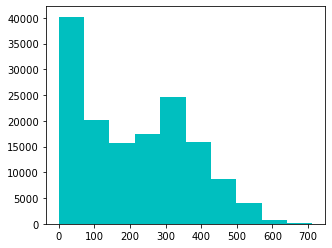

(0010, 0010) Patient's Name                      PN: 'ProstateX-0013'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 951


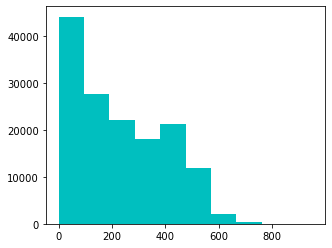

(0010, 0010) Patient's Name                      PN: 'ProstateX-0182'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 832


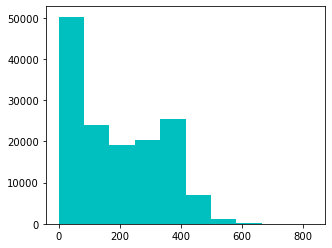

(0010, 0010) Patient's Name                      PN: 'ProstateX-0026'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 887


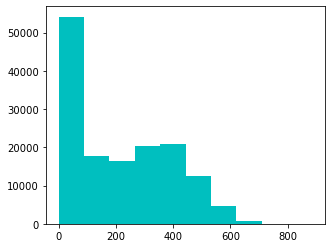

(0010, 0010) Patient's Name                      PN: 'ProstateX-0026'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 905


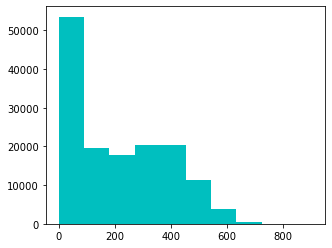

(0010, 0010) Patient's Name                      PN: 'ProstateX-0086'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 662


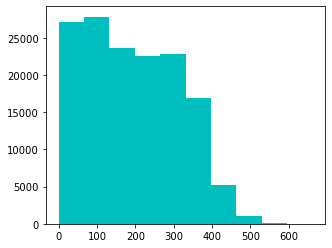

(0010, 0010) Patient's Name                      PN: 'ProstateX-0109'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0103) Pixel Representation                US: 0
(0028, 0010) Rows                                US: 384
(0028, 0011) Columns                             US: 384
(0028, 0101) Bits Stored                         US: 12
(0028, 0107) Largest Image Pixel Value           US: 849


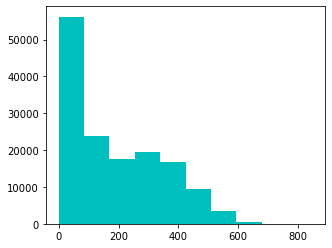

In [78]:
%matplotlib inline

for i in train_paths_Images[:10]:
    _1 = Tag('00100010') ## id / name
    _2 = Tag('00280002') ## samples per pixel. 1: monochrome
    _3 = Tag('00280103') ## pixel represenation. 0: unsinged. 1: signed
    _r = Tag('00280010') ## rows
    _c = Tag('00280011') ## cols 
    _b = Tag('00280101') ## bits stored
    _l = Tag('00280107') ## largest pixel val
    print(pydicom.dcmread(i).get(_1))
    print(pydicom.dcmread(i).get(_2))
    print(pydicom.dcmread(i).get(_3))
    print(pydicom.dcmread(i).get(_r))
    print(pydicom.dcmread(i).get(_c))
    print(pydicom.dcmread(i).get(_b))
    print(pydicom.dcmread(i).get(_l))
    plt.figure(figsize=(5, 4))
    arr_img = pydicom.dcmread(i).pixel_array
    arr_img_f = arr_img.flatten()
    #arr_mask = pydicom.dcmread(j).pixel_array
    plt.hist(arr_img_f, color='c')
    plt.show()


In [77]:
for j in train_paths_Masks[:10]:
    print(r'**** {} ****'.format(j))
    arr_mask = cv2.imread(j,0)
    print(arr_mask.shape)
    arr_mask_f = arr_mask.flatten()
    print(np.unique(arr_mask_f))
    print()
    # plt.hist(arr_mask_f, color='c')
    # plt.show()

**** DATASET/Prostatex-0076/mask/IM-0314-0006.png ****
(384, 384)
[  0   2 255]

**** DATASET/Prostatex-0154/mask/IM-0628-0003.png ****
(384, 384)
[  0   2 255]

**** DATASET/Prostatex-0171/mask/IM-0699-0007.png ****
(384, 384)
[  0   1   2 255]

**** DATASET/Prostatex-0181/mask/IM-0741-0017.png ****
(384, 384)
[  0   1   2 255]

**** DATASET/Prostatex-0013/mask/IM-0057-0016.png ****
(384, 384)
[  0   1   2 255]

**** DATASET/Prostatex-0182/mask/IM-0745-0012.png ****
(384, 384)
[  0   1   2 255]

**** DATASET/Prostatex-0026/mask/IM-0110-0004.png ****
(384, 384)
[0]

**** DATASET/Prostatex-0026/mask/IM-0110-0005.png ****
(384, 384)
[0]

**** DATASET/Prostatex-0086/mask/IM-0353-0012.png ****
(384, 384)
[  0   1   2 255]

**** DATASET/Prostatex-0109/mask/IM-0446-0005.png ****
(384, 384)
[0]



In [89]:

sample_per_pixel = []
pixel_representation = []
rows = []
cols = []
bits_stored = []
largest_pixel_val = []

for i in imagePaths:
    _1 = Tag('00100010') ## id / name PN
    _2 = Tag('00280002') ## samples per pixel. 1: monochrome 
    _3 = Tag('00280103') ## pixel represenation. 0: unsinged. 1: signed
    _r = Tag('00280010') ## rows
    _c = Tag('00280011') ## cols 
    _b = Tag('00280101') ## bits stored
    _l = Tag('00280107') ## largest pixel val
    
    sample_per_pixel.append(pydicom.dcmread(i).get(_2).value)
    pixel_representation.append(pydicom.dcmread(i).get(_3).value)
    rows.append(pydicom.dcmread(i).get(_r).value)
    cols.append(pydicom.dcmread(i).get(_c).value)
    bits_stored.append(pydicom.dcmread(i).get(_b).value)
    largest_pixel_val.append(pydicom.dcmread(i).get(_l).value)


In [105]:
print(np.unique(sample_per_pixel))
print(np.unique(pixel_representation))
print(np.unique(rows))
print(r'Across {} of samples, {} has # of rows = 320, {} has # of rows 384, {} has # of rows 640'.format(len(rows),
                                                                                                         rows.count(320),
                                                                                                         rows.count(384),
                                                                                                         rows.count(640)))
print(np.unique(cols))
print(r'Across {} of samples, {} has # of cols = 320, {} has # of cols 384, {} has # of cols 640'.format(len(cols),
                                                                                                         cols.count(320),
                                                                                                         cols.count(384),
                                                                                                         cols.count(640)))     
print(np.unique(bits_stored))


[1]
[0]
[320 384 640]
Across 4104 of samples, 109 has # of rows = 320, 3968 has # of rows 384, 27 has # of rows 640
[320 384 640]
Across 4104 of samples, 109 has # of cols = 320, 3968 has # of cols 384, 27 has # of cols 640
[12]


In [106]:
r = []
c = []
l = []
val = []
for j in train_paths_Masks:
    arr_mask = cv2.imread(j,0)
    arr_mask_f = arr_mask.flatten()
    _val = np.unique(arr_mask_f)
    
    r.append(arr_mask.shape[0])
    c.append(arr_mask.shape[1])
    l.append(len(_val))
    val.append(_val)

In [136]:
print(np.unique(r))
print(r'Across {} of samples, {} has # of rows = 320, {} has # of rows 384, {} has # of rows 640'.format(len(r),
                                                                                                         r.count(320),
                                                                                                         r.count(384),
                                                                                                         r.count(640)))
print(np.unique(c))
print(r'Across {} of samples, {} has # of cols = 320, {} has # of cols 384, {} has # of cols 640'.format(len(c),
                                                                                                         c.count(320),
                                                                                                         c.count(384),
                                                                                                         c.count(640)))
print(np.unique(l))
pheripheral = len([e for i,e in enumerate(val) if len(e) == 3 and 1 in e])
transitional = len([e for i,e in enumerate(val) if len(e) == 3 and 2 in e])
print(r'Across {} of samples, {} are completely black, {} has 1 area, {} has two areas, {} has three areas(???) \
    Among those that only contains 1 areas, {} contains pheripheral zone(label 1), {} contains transitional zone(label 2)'\
      .format(len(l),l.count(1),l.count(3),l.count(4),
       l.count(5),pheripheral,transitional))

[320 384 640]
Across 2749 of samples, 79 has # of rows = 320, 2650 has # of rows 384, 20 has # of rows 640
[320 384 640]
Across 2749 of samples, 79 has # of cols = 320, 2650 has # of cols 384, 20 has # of cols 640
[1 3 4 5]
Across 2749 of samples, 821 are completely black, 752 has 1 area, 1157 has two areas, 19 has three areas(???) \
    Among those that only contains 1 areas, 333 contains pheripheral zone(label 1), 419 contains transitional zone(label 2)


What is this??

In [117]:
__d = [i for i, e in enumerate(l) if e == 5]

In [120]:
[val[i] for i in __d]

[array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8),
 array([  0,   1,   2,   3, 255], dtype=uint8)]